Daniel Ardila

CSCI E-83: Fundamentals of Data Science

Graduate Independent Project

## SDM for Pterois volitans in the Seaflower region


### Seaflower Biosphere Reserve
The Seaflower Biosphere Reserve is a protected area located in the Caribbean Sea, off the coast of Colombia. It is one of the largest marine protected areas in the world, covering an area of approximately 38,000 square kilometers (14,670 square miles). The Seaflower Biosphere Reserve is home to a diverse array of marine life, including coral reefs, mangroves, seagrass beds, and open ocean habitats. It is also home to a number of endangered and threatened species, including sea turtles, sharks, and dolphins. The biosphere reserve is managed by the Colombian National Authority for Environmental Licenses (ANLA) and is designated as a Ramsar site, recognizing its importance as a wetland of international significance. The Seaflower Biosphere Reserve is an important resource for scientific research, education, and conservation, and plays a key role in the protection of the region's marine biodiversity.

### Pterois volitans
Pterois volitans, also known as the red lionfish, is a venomous marine fish native to the Indo-Pacific region. It has been introduced to the Caribbean and other parts of the western Atlantic Ocean, where it has established itself as an invasive species. Red lionfish are known for their ornate, feather-like fins and striking red, white, and black coloration. They are predatory fish that feed on a variety of smaller fishes and invertebrates, and have the potential to negatively impact native marine ecosystems by preying on native species and competing with them for resources. Red lionfish are also a potential threat to human health, as they are venomous and can deliver a painful sting if they are handled or come into contact with humans. 

### The problem

In recent years, with the aid of locals and PNEC (National Plan of Scientific Expeditions) of Colombia many records have been registered in the past years containing the presence of the specie Pterois volitans in the Seaflower area. The presence of this species is a danger not only for humans, but also for other species and for the ecosystem in general. For this reason, the development of a Species Distribution Model (SDM) would be helpful for authorities in order to start taking action plans in this area. The aim of this project is to create a toy model of a SDM for the Pterois volitans in the area of seaflower.



### Data Selection and Datasets
   
  
 The main dataset to be analyzed in this project is from OBIS. The Ocean Biogeographic Information System (OBIS) is an international network that collects and shares data on the distribution and abundance of marine species around the world. OBIS aims to improve our understanding of the diversity, distribution, and abundance of marine life and to provide a central repository for data on marine species from around the world. The organization maintains a database of more than 150 million records of marine species, including both observed and predicted distributions. OBIS also provides tools and resources for data management, analysis, and visualization, and works with a network of partners to promote the use of marine biogeographic data for scientific research, conservation, and management.

A file of 12.9 GB was downloaded from their web page containing all marine records until october of 2022.

In order to develop a SDM algorithm, environmental variables are necessary, these one are obtained from Bio-ORACLE database. Bio-ORACLE is a global database of environmental and ecological data that is used to model the distribution and potential impacts of marine species. Bio-ORACLE is designed to provide information on the environmental conditions that different species can tolerate, as well as the potential impacts that species may have on their environment. The database includes data on factors such as temperature, salinity, pH, oxygen levels, and nutrient levels, and can be used to predict the distribution and potential impacts of species in different parts of the world. Bio-ORACLE is used by scientists, conservationists, and resource managers to better understand the impacts of species on the environment and to inform the management of marine resources.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Select columns of interest and read OBIS file
columns = ['decimalLongitude', 'decimalLatitude', 'scientificName', 'species',
       'genus', 'phylum', 'country', 'geodeticDatum', 'waterBody',
       'islandGroup', 'island', 'coordinateUncertaintyInMeters', 'bathymetry',
       'redlist_category']

obis_df = pd.read_parquet('C://Users//danie//Documents//Data Science//projectCCO//CCO//obis_20221006.parquet', 
                          columns = columns
                          ,engine='fastparquet')


In [3]:
obis_df.head()

,decimalLongitude,decimalLatitude,scientificName,species,genus,phylum,country,geodeticDatum,waterBody,islandGroup,island,coordinateUncertaintyInMeters,bathymetry,redlist_category
0,156.116669,32.038334,Idiacanthus fasciola,Idiacanthus fasciola,Idiacanthus,Chordata,None,None,None,None,None,None,4327,None
1,-111.066666,27.933332,Scorpaenodes xyris,Scorpaenodes xyris,Scorpaenodes,Chordata,Mexico,None,None,None,None,None,12,None
2,-118.266670,31.583334,Tarletonbeania crenularis,Tarletonbeania crenularis,Tarletonbeania,Chordata,Mexico,None,None,None,None,None,1162,None
3,-105.116669,19.533333,Scorpaenodes xyris,Scorpaenodes xyris,Scorpaenodes,Chordata,Mexico,None,None,None,None,None,45,None
4,-155.373337,27.453333,Idiacanthus fasciola,Idiacanthus fasciola,Idiacanthus,Chordata,None,None,None,None,None,None,5538,None


In [4]:
#Filter the OBIS dataset to the region of interest (Seaflower)
filter_seaflower1 = obis_df["decimalLongitude"] >= -82.23755 
filter_seaflower2 = obis_df["decimalLongitude"] <= -78.00940 
filter_seaflower3 = obis_df['decimalLatitude']>=10.81621
filter_seaflower4 = obis_df['decimalLatitude']<=16.17210

obis_df_seaflower = obis_df[filter_seaflower1 & filter_seaflower2 & filter_seaflower3
                           & filter_seaflower4]
obis_df_seaflower.reset_index(drop=True, inplace=True)

In [6]:
obis_df_seaflower.head()

,decimalLongitude,decimalLatitude,scientificName,species,genus,phylum,country,geodeticDatum,waterBody,islandGroup,island,coordinateUncertaintyInMeters,bathymetry,redlist_category
0,-81.341652,13.365150,Lobophora,None,Lobophora,Ochrophyta,Colombia,None,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Providencia,None,159,None
1,-81.341652,13.365150,Lobophora,None,Lobophora,Ochrophyta,Colombia,None,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Providencia,None,159,None
2,-81.341652,13.365150,Lobophora,None,Lobophora,Ochrophyta,Colombia,None,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Providencia,None,159,None
3,-81.414398,13.365517,Lobophora,None,Lobophora,Ochrophyta,Colombia,None,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Providencia,None,89,None
4,-81.414398,13.365517,Lobophora,None,Lobophora,Ochrophyta,Colombia,None,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Providencia,None,89,None


### EDA for geographical data

In [7]:
# let's investigate the number of records for a given species per coordinate
records_per_place = obis_df_seaflower.groupby(['decimalLongitude','decimalLatitude','species','genus','phylum','bathymetry'])['species'].count().reset_index(name="records")
records_per_place

,decimalLongitude,decimalLatitude,species,genus,phylum,bathymetry,records
0,-82.236000,12.764000,Chelonia mydas,Chelonia,Chordata,402,1
1,-82.233330,12.733333,Dibranchus atlanticus,Dibranchus,Chordata,439,2
2,-82.233299,12.733300,Bathypterois bigelowi,Bathypterois,Chordata,439,1
3,-82.233299,12.733300,Bufoceratias wedli,Bufoceratias,Chordata,439,1
4,-82.233299,12.733300,Chauliodus sloani,Chauliodus,Chordata,439,1
...,...,...,...,...,...,...,...
13673,-78.050003,12.800000,Oceanodroma leucorhoa,Oceanodroma,Chordata,3864,1
13674,-78.050003,12.800000,Puffinus lherminieri,Puffinus,Chordata,3864,1
13675,-78.037003,12.025000,Chelonia mydas,Chelonia,Chordata,3791,1
13676,-78.030998,14.879000,Eretmochelys imbricata,Eretmochelys,Chordata,1999,1


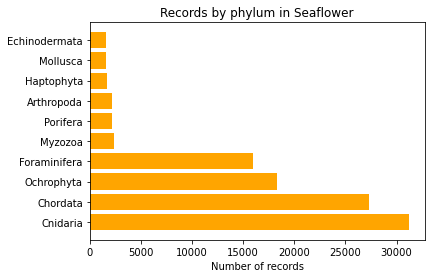

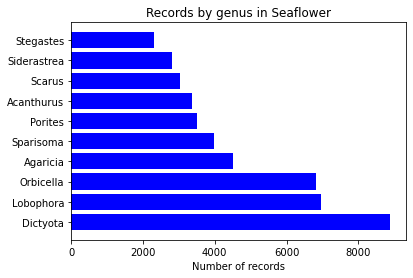

In [8]:
#Let's inevstigate how many phylums and genus are in this region
obis_seaflower_genus = obis_df_seaflower.groupby(['genus','phylum'])['decimalLongitude'].count().reset_index(name="records")
obis_seaflower_phylum = obis_df_seaflower.groupby(['phylum'])['decimalLongitude'].count().reset_index(name="records")

#sort the dataframes
obis_seaflower_genus_srt =  obis_seaflower_genus.sort_values(by = 'records',ascending = False)  
obis_seaflower_phylum_srt =  obis_seaflower_phylum.sort_values(by = 'records',ascending = False)  

genus_df = obis_seaflower_genus_srt.head(10)
phylum_df = obis_seaflower_phylum_srt.head(10)


#Let's plot the 10 phylums and genuses with the most number of records

plt.figure()
_= plt.barh(phylum_df['phylum'], phylum_df['records'], color='orange')
_=plt.title('Records by phylum in Seaflower')
_=plt.xlabel('Number of records')

plt.figure()
_= plt.barh(genus_df['genus'], genus_df['records'], color='blue')
_=plt.title('Records by genus in Seaflower')
_=plt.xlabel('Number of records')

##### We can see the biodiversity in this region and how the Cnidaria and Chordata are the phylums with the greatest number of records.

In [9]:
#Let's investigate the number of missing values for each column in our dataset from seaflower
df_occurrences = obis_df_seaflower
clean_cols = []
for col in df_occurrences.columns:
    missing = df_occurrences.loc[:,col].isnull().sum()
#     if missing < 1552:
#         clean_cols.append(col)
    print('For {} the number of missing values = {}'.format(col,missing))

For decimalLongitude the number of missing values = 0
For decimalLatitude the number of missing values = 0
For scientificName the number of missing values = 3
For species the number of missing values = 37526
For genus the number of missing values = 11532
For phylum the number of missing values = 13221
For country the number of missing values = 18419
For geodeticDatum the number of missing values = 18187
For waterBody the number of missing values = 24293
For islandGroup the number of missing values = 31602
For island the number of missing values = 31780
For coordinateUncertaintyInMeters the number of missing values = 116988
For bathymetry the number of missing values = 0
For redlist_category the number of missing values = 116899


Now, we will continue investigating for our specie. 

In [10]:
# Filtered dataset for Pterois volitans
pterois = obis_df_seaflower[obis_df_seaflower['species'] == 'Pterois volitans']
pterois.head()

,decimalLongitude,decimalLatitude,scientificName,species,genus,phylum,country,geodeticDatum,waterBody,islandGroup,island,coordinateUncertaintyInMeters,bathymetry,redlist_category
44982,-81.724403,12.498900,Pterois volitans,Pterois volitans,Pterois,Chordata,Colombia,EPSG:4326,None,None,None,None,-3,None
44988,-81.341652,13.365150,Pterois volitans,Pterois volitans,Pterois,Chordata,Colombia,WGS84,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Providencia,None,159,None
44989,-81.863892,12.139719,Pterois volitans,Pterois volitans,Pterois,Chordata,Colombia,WGS84,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Cayos de Albuquerque,None,2,None
44990,-81.895828,12.164997,Pterois volitans,Pterois volitans,Pterois,Chordata,Colombia,WGS84,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",Cayos de Albuquerque,None,100,None
44996,-81.733330,12.500417,Pterois volitans,Pterois volitans,Pterois,Chordata,Colombia,WGS84,Mar Caribe,"Archipiélago de San Andrés, Providencia y Sant...",San Andrés Isla,None,-6,None


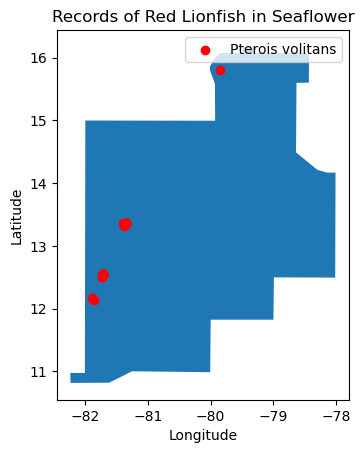

In [29]:
#Let's plot the records in the seaflower region
import geopandas as gpd
seaflower_shape = gpd.read_file('reserva_biosfera_seaflower.shp')
seaflower_shape.plot()
plt.scatter(pterois['decimalLongitude'],pterois['decimalLatitude'], color='red',label='Pterois volitans')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Records of Red Lionfish in Seaflower')
plt.show()

In [11]:
specie_to_study = 'Pterois volitans'
records_per_place[records_per_place['species'] == specie_to_study ]

,decimalLongitude,decimalLatitude,species,genus,phylum,bathymetry,records
1187,-81.895828,12.164997,Pterois volitans,Pterois,Chordata,100,1
2028,-81.863892,12.139719,Pterois volitans,Pterois,Chordata,2,1
4180,-81.733963,12.502360,Pterois volitans,Pterois,Chordata,81,1
4302,-81.733330,12.500417,Pterois volitans,Pterois,Chordata,-6,1
4566,-81.724403,12.498900,Pterois volitans,Pterois,Chordata,-3,1
4567,-81.719872,12.547161,Pterois volitans,Pterois,Chordata,-50,47
6113,-81.405060,13.362722,Pterois volitans,Pterois,Chordata,71,1
7208,-81.376274,13.317805,Pterois volitans,Pterois,Chordata,-3,1
8312,-81.347000,13.355000,Pterois volitans,Pterois,Chordata,213,1
8768,-81.341652,13.365150,Pterois volitans,Pterois,Chordata,159,4


### EDA for environmental variables

The dataset containing the environmental variables was downloaded from Bio-ORACLE. This dataset contains the following variables (the mean in the sea surface is calculated for each variable):

- Primary productivity (g/m^3/day)
- Level of phosphate (micromol/m^3)
- Velocity of the current (m/s) 
- Salinity (PSS)
- Dissolved oxygen concentration (micromol/m^3)
- Bathymetry (m)
- Carbon phytoplankton biomass (micromol/m^3)
- Sea surface temperature (degrees Celsius)
- Silicate concentration (micromol/m^3)

In [12]:
import seaborn as sn

#load the dataset
env_variables = pd.read_csv('envVars.csv')
env_variables.head()


,x,y,BO22_ppmean_ss,BO22_phosphatemean_ss,BO22_curvelmean_ss,BO22_salinitymean_ss,BO22_dissoxmean_ss,MS_bathy_5m,BO22_carbonphytomean_ss,BO22_tempmean_ss,BO22_silicatemean_ss
0,-82.208333,16.125,0.000441,0.000273,0.095353,35.771671,199.432846,-43,0.529167,28.308544,6.101185
1,-82.125000,16.125,0.000464,0.000340,0.087280,35.776047,199.500931,-39,0.534671,28.306925,6.074518
2,-82.041667,16.125,0.000415,0.000331,0.079599,35.777386,199.617432,-31,0.510880,28.279341,6.057925
3,-81.958333,16.125,0.000415,0.000339,0.078159,35.777256,199.640884,-26,0.509031,28.267130,6.054565
4,-81.875000,16.125,0.000447,0.000421,0.083812,35.775810,199.691849,-40,0.517831,28.252151,6.042745


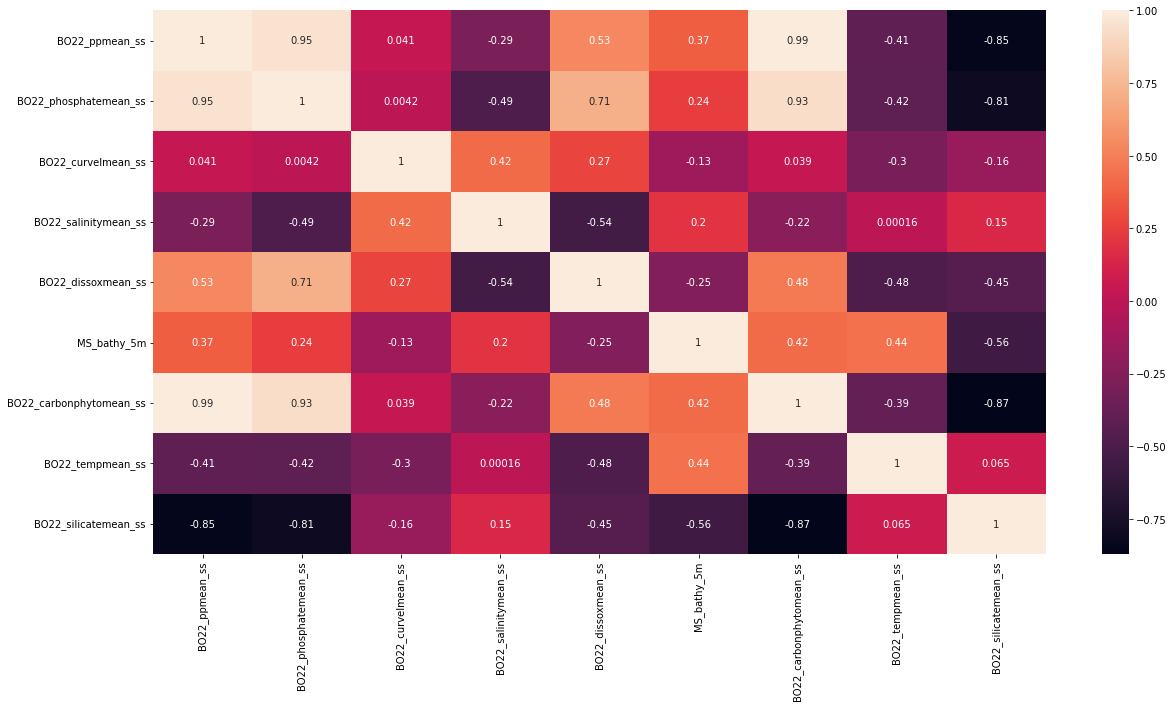

In [13]:
# Explore the correlation between these variables

corr_matrix = env_variables.iloc[:,2:].corr()
plt.figure(figsize = (20,10))
sn.heatmap(corr_matrix, annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

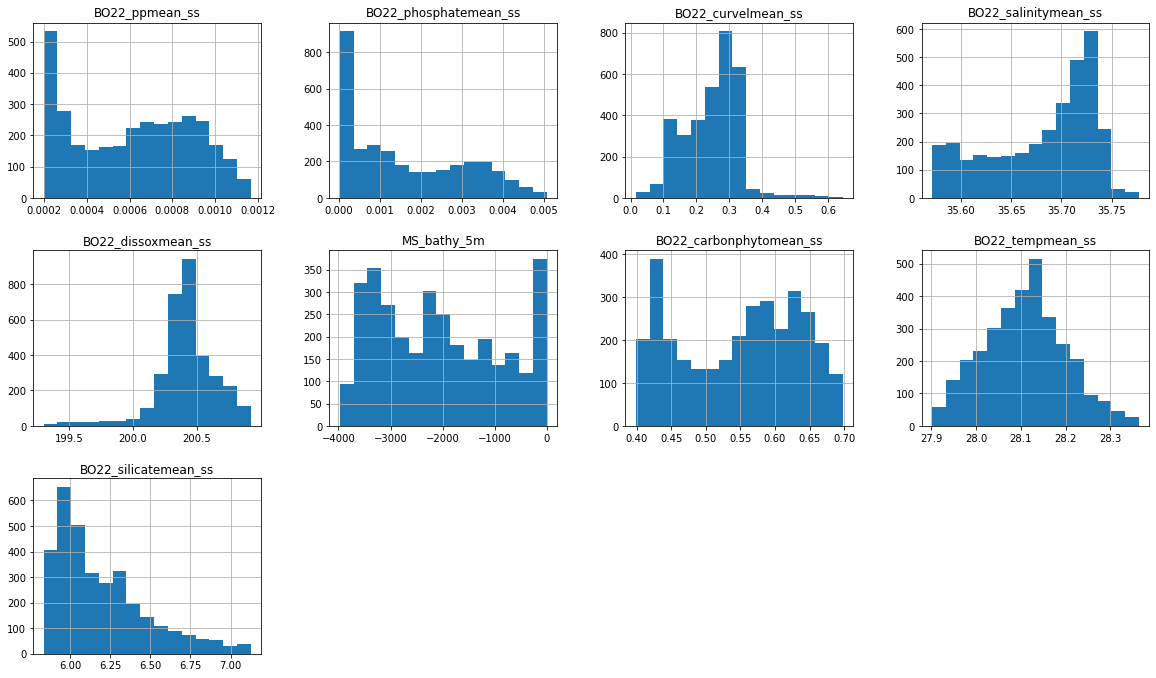

In [15]:
# plot the distribution for each env variable
plt.figure()
env_variables.iloc[:,2:].hist(bins=15, figsize=(20, 20), layout=(5, 4))
plt.show()

##### In order to avoid multicollinearity in the independent variables it is necessary to do a feature selection process. For this, we are going to use the Variance Inflation Factor (VIF) that will help us tackle multicollinerarity.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(df, considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

env_vars_no_loc = env_variables.iloc[:,2:]

#select the features to consider
considered_features = env_vars_no_loc.columns
df_vif_variables = compute_vif(env_vars_no_loc,considered_features).sort_values('VIF', ascending=False)
print(df_vif_variables)

# Every time we drop a variable is important to recalculate the VIF, since feature selection is best
# performed if we include or remove one variable at a time 
while df_vif_variables.iloc[0,1]>=5:
    env_vars_no_loc.drop(df_vif_variables.iloc[0,0], inplace=True, axis=1)
    print('Variable dropped: ',df_vif_variables.iloc[0,0])
    df_vif_variables = df_vif_variables.iloc[1: , :]
    considered_features = env_vars_no_loc.columns
    df_vif_variables = compute_vif(env_vars_no_loc,considered_features).sort_values('VIF', ascending=False)
    print('\n',df_vif_variables)


                  Variable         VIF
6  BO22_carbonphytomean_ss  329.405758
0           BO22_ppmean_ss  268.772197
1    BO22_phosphatemean_ss   66.906772
8     BO22_silicatemean_ss   14.011346
4       BO22_dissoxmean_ss   10.492361
3     BO22_salinitymean_ss    6.572687
7         BO22_tempmean_ss    6.255945
5              MS_bathy_5m    4.297673
2       BO22_curvelmean_ss    2.656259
Variable dropped:  BO22_carbonphytomean_ss

                 Variable        VIF
1  BO22_phosphatemean_ss  61.886936
0         BO22_ppmean_ss  44.958591
7   BO22_silicatemean_ss  10.458564
4     BO22_dissoxmean_ss   8.777600
6       BO22_tempmean_ss   5.701929
3   BO22_salinitymean_ss   5.381265
5            MS_bathy_5m   4.254997
2     BO22_curvelmean_ss   2.406440
Variable dropped:  BO22_phosphatemean_ss

                Variable        VIF
0        BO22_ppmean_ss  12.918785
6  BO22_silicatemean_ss  10.438692
5      BO22_tempmean_ss   5.594650
3    BO22_dissoxmean_ss   4.624273
2  BO22_salinitymean_ss

#### Notice that we are using the default cutoff for the VIF (<5). 

After this process we kept the following environmental variables: 

- Dissolved oxygen concentration (micromol/m^3)
- Bathymetry (m)
- Silicate concentration (micromol/m^3)
- Salinity (PSS)
- Velocity of the current (m/s) 
- Sea surface temperature (degrees Celsius)

And we dropped the following variables: 

- Primary productivity (g/m^3/day)
- Level of phosphate (micromol/m^3)
- Carbon phytoplankton biomass (micromol/m^3)


[]

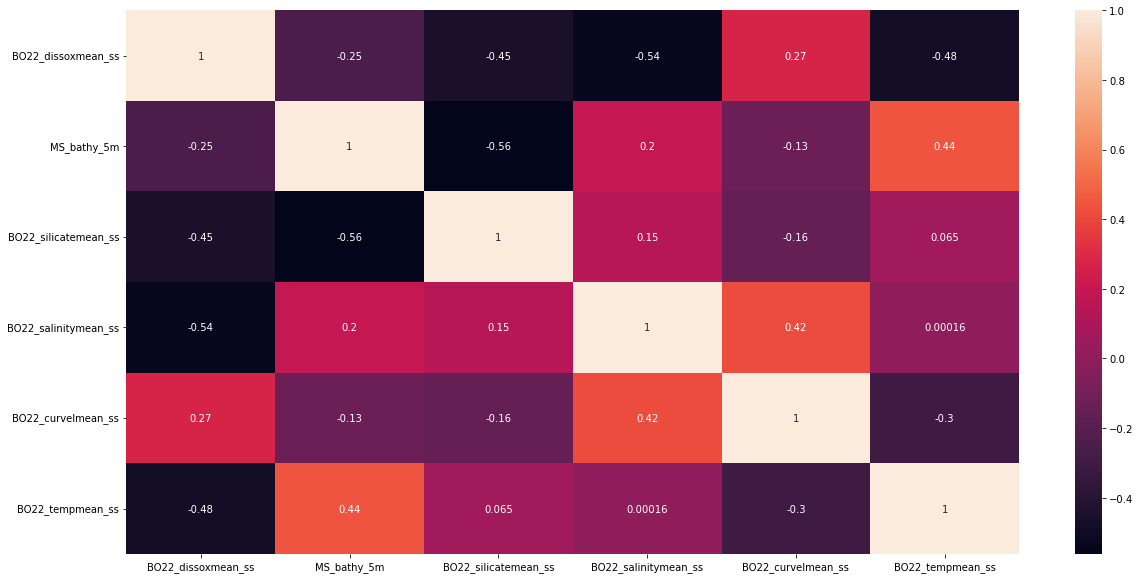

In [31]:
#Let's calculate again the correlation matrix for the final environmental variables and plot it
final_env_variables = list(df_vif_variables['Variable'])
corr_matrix_final = env_variables[final_env_variables].corr()
plt.figure(figsize = (20,10))
sn.heatmap(corr_matrix_final, annot=True)
plt.plot()

In [32]:
# let's add the coordinates to our df of env variables and rename the columns
final_variables = ['x','y'] + final_env_variables
df_env_variables = env_variables[final_variables]
df_env_variables.head()
df_env_variables.rename(columns = {'x':'decimalLongitude','y':'decimalLatitude'}, inplace=True) 
df_env_variables

,decimalLongitude,decimalLatitude,BO22_dissoxmean_ss,MS_bathy_5m,BO22_silicatemean_ss,BO22_salinitymean_ss,BO22_curvelmean_ss,BO22_tempmean_ss
0,-82.208333,16.125,199.432846,-43,6.101185,35.771671,0.095353,28.308544
1,-82.125000,16.125,199.500931,-39,6.074518,35.776047,0.087280,28.306925
2,-82.041667,16.125,199.617432,-31,6.057925,35.777386,0.079599,28.279341
3,-81.958333,16.125,199.640884,-26,6.054565,35.777256,0.078159,28.267130
4,-81.875000,16.125,199.691849,-40,6.042745,35.775810,0.083812,28.252151
...,...,...,...,...,...,...,...,...
3259,-78.375000,10.875,200.106522,-3485,7.085029,35.613400,0.026757,28.126129
3260,-78.291667,10.875,200.092056,-3479,7.087587,35.606918,0.021245,28.126099
3261,-78.208333,10.875,200.080109,-3473,7.080511,35.605667,0.020716,28.125210
3262,-78.125000,10.875,200.067413,-3466,7.068102,35.604187,0.026157,28.122038


### For the next steps we are going to use R language since some packages are focus on geographical data

In [22]:
#Let's save our dataframe of pterois to load it in R
pterois.to_csv('pterois.csv',index=False)

<img src="RCODE-1.png" alt="Alternative text" />


In [33]:
# The two dataframes from R
df_pterois_final = pd.read_csv('pterois_final.csv')
df_background_pterois = pd.read_csv('background_pterois.csv')

df_pterois_final.head()

,Unnamed: 0,cells,BO22_ppmean_ss,BO22_phosphatemean_ss,BO22_curvelmean_ss,BO22_salinitymean_ss,BO22_dissoxmean_ss,MS_bathy_5m,BO22_carbonphytomean_ss,BO22_tempmean_ss,BO22_silicatemean_ss,pa,decimalLongitude,decimalLatitude
0,1,2251,0.000394,0.000447,0.236789,35.710571,200.330231,-295,0.485630,28.187267,6.274777,1,-81.708333,12.458333
1,2,1694,0.000552,0.001238,0.212095,35.737961,200.342896,-65,0.542309,28.137947,6.144437,1,-81.375000,13.375000
2,3,2453,0.000347,0.000301,0.265762,35.693256,200.334686,-41,0.469238,28.231243,6.291962,1,-81.875000,12.125000
3,4,2453,0.000347,0.000301,0.265762,35.693256,200.334686,-41,0.469238,28.231243,6.291962,1,-81.875000,12.125000
4,5,2200,0.000421,0.000540,0.231028,35.713104,200.327225,-97,0.494581,28.180145,6.256915,1,-81.708333,12.541667


In [34]:
df_background_pterois.head()

,Unnamed: 0,cell,x,y,BO22_ppmean_ss,BO22_phosphatemean_ss,BO22_curvelmean_ss,BO22_salinitymean_ss,BO22_dissoxmean_ss,MS_bathy_5m,BO22_carbonphytomean_ss,BO22_tempmean_ss,BO22_silicatemean_ss
0,1,185,-79.625000,15.875000,0.000903,0.003361,0.110995,35.584057,200.534866,-948,0.637172,28.114426,5.919933
1,2,1602,-80.541667,13.541667,0.000653,0.001768,0.293606,35.739143,200.432907,-950,0.566856,28.107788,6.121002
2,3,438,-79.791667,15.458333,0.000893,0.003352,0.138781,35.584332,200.539322,-1752,0.636716,28.096500,5.925857
3,4,2772,-80.791667,11.625000,0.000239,0.000076,0.275775,35.673763,200.444763,-3034,0.427136,28.189131,6.424100
4,5,558,-78.291667,15.291667,0.001063,0.004451,0.134055,35.588200,200.806091,-2331,0.677201,28.042162,5.886172


In [37]:
#list of the columns we want to keep
keep_cols =  ['cells','decimalLongitude', 'decimalLatitude'] + final_env_variables 
df_pterois_final = df_pterois_final[keep_cols]
df_background_pterois = df_background_pterois.rename(columns = {'cell':'cells','x':'decimalLongitude','y':'decimalLatitude'})
df_background_pterois = df_background_pterois[keep_cols]

#Check if the two dataframes have the same columns
sum(df_background_pterois.columns ==  df_pterois_final.columns) == len(df_background_pterois.columns)

True

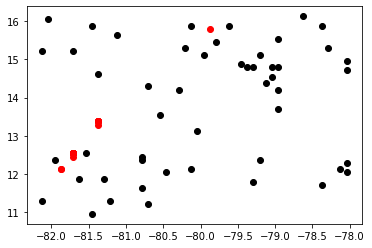

In [39]:
#Let's create a column called 'pa' indicating presence/absence of a species in a particular place

n_background = len(df_background_pterois)

df_pterois_final['pa'] = [1]*len(df_pterois_final)
df_background_pterois['pa'] = [0]*n_background

#Let's add the species columns
df_pterois_final['species'] = [specie_to_study]*len(df_pterois_final)
df_background_pterois['species'] = [specie_to_study]*n_background


#ABSENCE AND PRESENCE
seaflower_shape.plot()
plt.scatter(df_background_pterois['decimalLongitude'],df_background_pterois['decimalLatitude'], color='black',
            label='background')
plt.scatter(df_pterois_final['decimalLongitude'],df_pterois_final['decimalLatitude'], color='red',
            label='presence')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [48]:
# Now, we are going to concatenate the two dataframes from presence and absence
frames = [df_pterois_final, df_background_pterois]
df_pterois_model = pd.concat(frames)
df_pterois_model.reset_index(drop=True, inplace=True)
df_pterois_model.to_csv('pterois_model.csv')
df_pterois_model.head()

,cells,decimalLongitude,decimalLatitude,BO22_dissoxmean_ss,MS_bathy_5m,BO22_silicatemean_ss,BO22_salinitymean_ss,BO22_curvelmean_ss,BO22_tempmean_ss,pa,species
0,2251,-81.708333,12.458333,200.330231,-295,6.274777,35.710571,0.236789,28.187267,1,Pterois volitans
1,1694,-81.375000,13.375000,200.342896,-65,6.144437,35.737961,0.212095,28.137947,1,Pterois volitans
2,2453,-81.875000,12.125000,200.334686,-41,6.291962,35.693256,0.265762,28.231243,1,Pterois volitans
3,2453,-81.875000,12.125000,200.334686,-41,6.291962,35.693256,0.265762,28.231243,1,Pterois volitans
4,2200,-81.708333,12.541667,200.327225,-97,6.256915,35.713104,0.231028,28.180145,1,Pterois volitans


Now, let's plot the distribution and the pairwise relationships for our final environmental variables.

<Figure size 432x288 with 0 Axes>

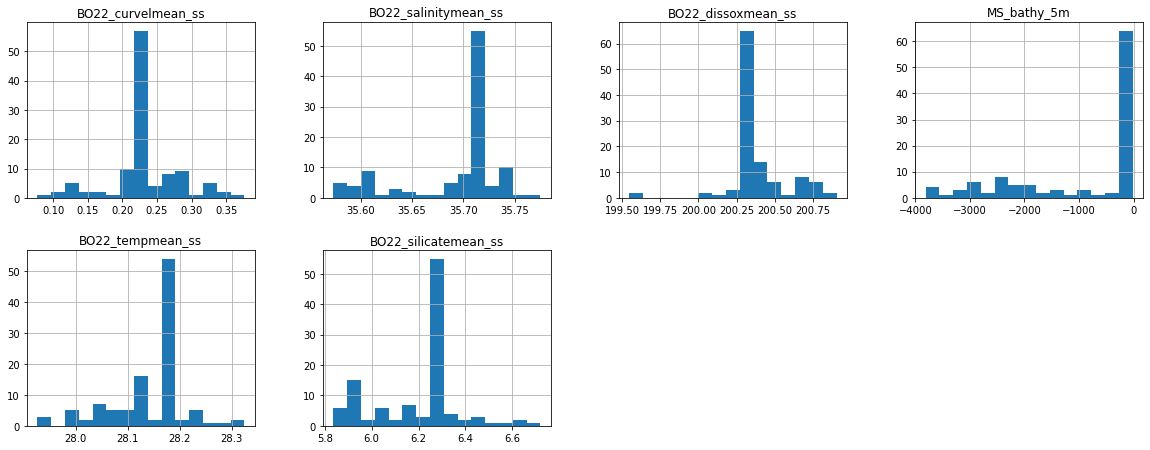

In [58]:
plt.figure()
df_pterois_model[feature_names].hist(bins=15, figsize=(20, 20), layout=(5, 4))
plt.show()

<Figure size 432x288 with 0 Axes>

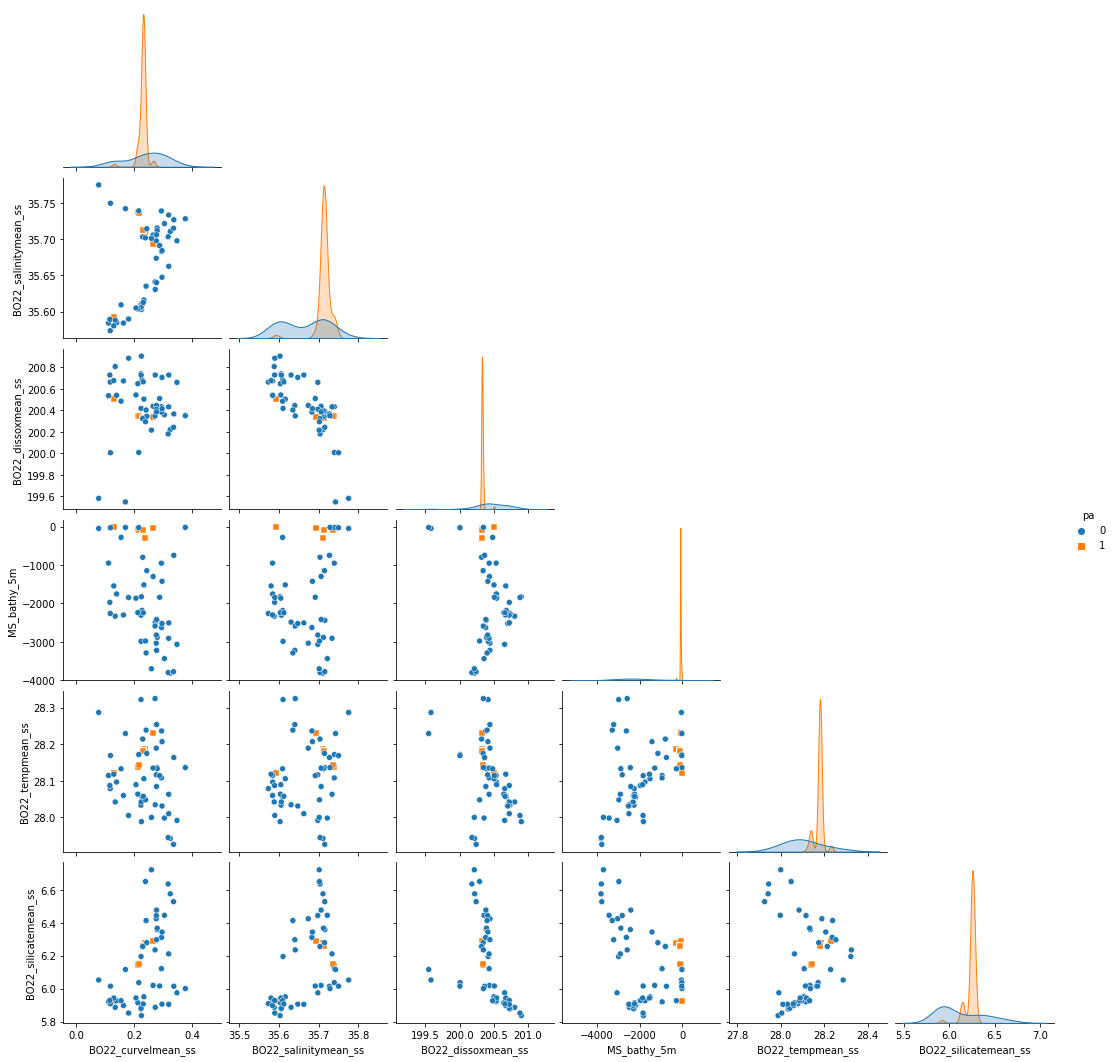

In [59]:
import seaborn as sns
plt.figure()
cols = list(feature_names)+['pa']
cols
sns.pairplot(df_pterois_model[cols], hue="pa", markers=["o", "s"], corner=True)
plt.show()

We can notice how our initial points ("pa" = 1) are poorly distributed, instead, our background points ("pa" = 0) very well distributed. This could represent a problem with the future models.

## Species Distribution Models

Now that we have a processed dataframe containing the geographical and environmental data, we are ready to start developing our models. First, we will split our dataframe into train and test data.

In [44]:
from sklearn.model_selection import train_test_split

feature_names = env_vars_no_loc.columns

#split dataset into 75% training data and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(df_pterois_model[feature_names], 
                                                    df_pterois_model['pa'], 
                                                    random_state=0, train_size = .75)

len(X_train), len(y_train),len(X_test), len(y_test)

(82, 82, 28, 28)

We will start using a logistic regression model.

              precision    recall  f1-score   support

     absence       1.00      0.77      0.87        13
    presence       0.83      1.00      0.91        15

    accuracy                           0.89        28
   macro avg       0.92      0.88      0.89        28
weighted avg       0.91      0.89      0.89        28



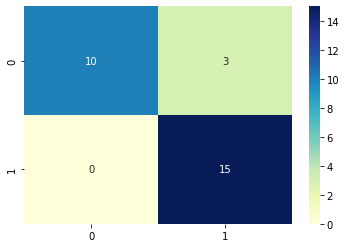

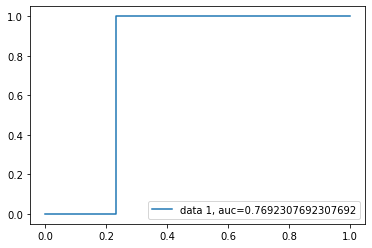

0.8928571428571429


In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report


# Create logistic regression model
lr_model = LogisticRegression(solver='liblinear', random_state=0)
#fit model
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

target_names = ['absence', 'presence']
print(classification_report(y_test, y_pred, target_names=target_names))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
lr_probs = lr_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)


plt.figure()
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(lr_model.score(X_test, y_test))

From this model we can notice problems with poor sample data and overfitting

## Optional (Random Forest)

The following 3 cells are optional and is based on the work of Daniel Furman.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from pycaret import classification as pycaret, internal

In [62]:

n_estimators = [50, 57, 63, 68, 75]
max_features = [2,3,4]
min_samples_split= [2,3,4]
criterion=['gini']

tuned_parameters = {'criterion': criterion, 'max_features': max_features, 'min_samples_split': min_samples_split, 'n_estimators': n_estimators}

rf = RandomForestClassifier(random_state=43)

clf = GridSearchCV(rf, tuned_parameters, cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
      
tuned_rf = clf.best_estimator_
tuned_rf.fit(X_train, y_train)
y_true, y_pred = y_test, tuned_rf.predict(X_test)
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_true, y_pred))

RandomForestClassifier(max_features=2, n_estimators=50, random_state=43)
Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.83      1.00      0.91        15

    accuracy                           0.89        28
   macro avg       0.92      0.88      0.89        28
weighted avg       0.91      0.89      0.89        28



<Figure size 432x288 with 0 Axes>

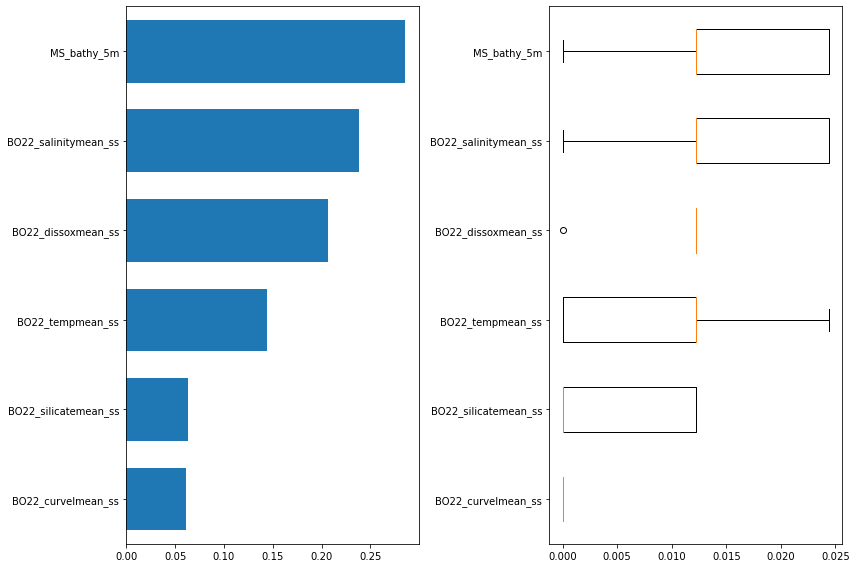

In [63]:
import matplotlib.pyplot as plt
plt.figure()
result = permutation_importance(tuned_rf, X_train, y_train, n_repeats=10,
                                random_state=43)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(tuned_rf.feature_importances_)
tree_indices = np.arange(0, len(tuned_rf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         tuned_rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(tuned_rf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[tree_importance_sorted_idx])
fig.tight_layout()
plt.show()

X_train.columns[tree_importance_sorted_idx]
colnames_sorted = pd.Series(X_train.columns[tree_importance_sorted_idx])
ranking_permutation = colnames_sorted.iloc[::-1]

This last plot show which variables had more effect on creating the model.

## R code for GLM and RF applied to SDMs

The next part was done in R since some packages are better to display SDMs.

<img src="RCODE-2.png" alt="Alternative text" />



As we can see we are doing the logistic regression and then plotting the probability species distribution:

<img src="MAP-1.png" alt="Alternative text" />
<img src="MAP-2.png" alt="Alternative text" />


From the ROC curve we can notice that we have an imbalanced dataset (which was clear from the beggining because of the spatial distribution of the records) and it is not very good at predicting at different places, but it has some advantages, some unexplored areas are indicating that it is highly possible to find the Pterois volitans in those regions.

It is possible to improve this model using another model out of the scope of the course suchs as Random Forest or Maximum Entropy. For purposes of comparison a random forest model was implemented:

<img src="MAP-3.png" alt="Alternative text" />



### This is also a more interesting map, since the probability of finding the specie is more uniformly distributed over the space. 

### Conclusions

 1. A toy model of a SDM for Pterois volitans was developed. Even though the GLM model was overfitted, it shows some locations for possible exploration. 
 2. One way to reduce this bias is to adquire more data that is uniformly distributed over the space.
 3. Random Forest is a great alternative in order to reduce the problems with overfitting and bias.
 4. Ensembled methods can be used to add information that different models may provide. 

### References 

1. (Kramer) The importance of correcting for sampling bias in MaxEnt species distribution models
2. (Franklin. J.) Mapping Species Distributions - Spatial Inference and Prediction
3. (Zhang C. , Chen Y.) How to predict biodiversity in space? An evaluation of modelling approaches in marine ecosystems